# Neural Network Visualization

First, we implement the Artificial Neural Network. For ease of implementation, we design an ANN with 1 input layer, 1 hidden layer and 1 output layer. The output layer contain only 1 output neuron.

Because the output has only 1 neuron so we use the **Binary Cross Entropy (BCE)** as the loss function instead of Cross Entropy (CE).

In [20]:
from keras.layers import Input, Dense
from keras import Model
from keras.models import load_model
import tensorflow as tf
# Neural Network

class NeuralNetwork:
  def __init__(self):
    return None

  # DEBUG HERE: in this code block, I drop 1 bug. Please find and correct it.
  def build(self, input_dim, output_dim):
    input = Input(shape=(input_dim,))
    hidden1 = Dense(8, use_bias = True, activation='sigmoid')(input)
    output = Dense(output_dim, use_bias = True, activation='softmax')(hidden1) # The activation function of the output layer is 'softmax'

    self.model = Model(input, output)
    return self.model

  def train(self, x_train, y_train):
    # Note that, in the optimizer, if we do not use the 'momentum' option,
    # the training process will be stucked and can not converge.
    opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9) # Stochastic Gradient Descent
    self.model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy())
    return self.model.fit(x_train, y_train, batch_size=64, epochs=500)

  def save(self, model_file):
    return self.model.save(model_file)

  def load(self, model_file):
    self.model = load_model(model_file)

  def summary(self):
    self.model.summary()

  def predict(self, x_test):
    return self.model.predict(x_test)

In this experiment we use a non-linear separable training samples and visualize a sample data using `matplotlib`. The training samples are two rings with the same center.

(-1.1601067271060412,
 1.1937830983377988,
 -1.1483487932987728,
 1.1190189629555753)

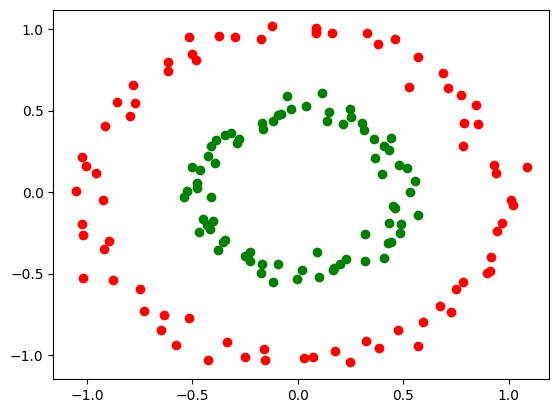

In [21]:
from sklearn import manifold, datasets
import matplotlib.pyplot as plt


n_samples = 150
n_components = 2
perplexities = [5, 30, 50, 100]

X_train, Y_train = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0 )

red = Y_train == 0
green = Y_train == 1
Y_train = Y_train.astype(float)

plt.plot(X_train[red, 0], X_train[red, 1], "ro")
plt.plot(X_train[green, 0], X_train[green, 1], "go")
plt.axis("tight")

Initialize and build the model.

In [22]:
nn_model = NeuralNetwork()
nn_model.build(2, 1)
#nn_model.model.layers[1].get_weights()

<Functional name=functional_7, built=True>

Then, train and visualize the loss values.

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7344  
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6976 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7048 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7083 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.6995
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.6951  
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6977 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.7012  
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6963 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6893 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.7035  
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7053 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.7041  
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.6965  
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6947 
Epoch 16/500
3/3 

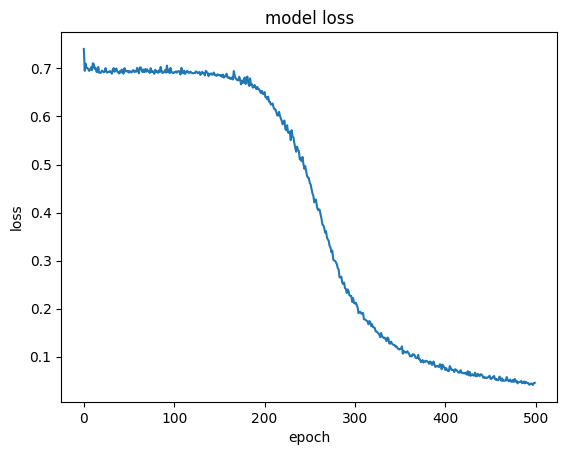

In [23]:
hist = nn_model.train(X_train, Y_train)

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['loss', 'validation'])
plt.show()

After training, we use the model to predict with test data on grid and draw the weak classifiers given from the parameters of hidden layer.

In [17]:
output_theta = nn_model.model.layers[2].get_weights()
print(output_theta)

[array([[ -2.4190855],
       [-12.098661 ],
       [-10.048013 ],
       [ -3.380265 ],
       [  7.4564934],
       [ -1.5695976],
       [  1.603184 ],
       [  5.0354095]], dtype=float32), array([-3.5934699], dtype=float32)]


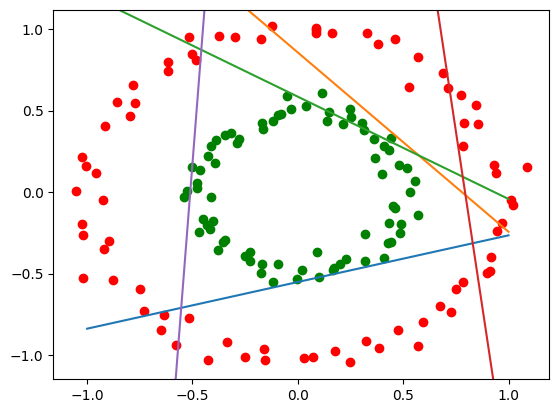

In [18]:
import numpy as np

# Get the trained parameters for visualization
theta = nn_model.model.layers[1].get_weights()
bias = theta[1]
param = theta[0]
# Plot red and blue points
plt.plot(X_train[red, 0], X_train[red, 1], "ro")
plt.plot(X_train[green, 0], X_train[green, 1], "go")
plt.axis("tight")

for idx in [1, 2, 3, 5, 7]: # Visualize neurons with HIGH confidence
  # TODO: plot hyperplane
  # y = a x + b --> a = -param[0]/param[1], b=-bias/param[1]
  a = -param[0][idx]/param[1][idx]
  b=-bias[idx]/param[1][idx]
  plt.plot([-1, 1], [a*(-1) + b, a*(1) + b])

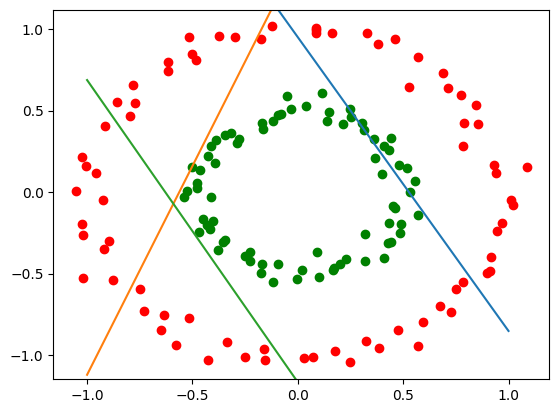

In [19]:
import numpy as np

# Get the trained parameters for visualization
theta = nn_model.model.layers[1].get_weights()
bias = theta[1]
param = theta[0]
# Plot red and blue points
plt.plot(X_train[red, 0], X_train[red, 1], "ro")
plt.plot(X_train[green, 0], X_train[green, 1], "go")
plt.axis("tight")

for idx in [0, 4, 6]: # Visualize neurons with LOW confidence
  # TODO: plot hyperplane
  # y = a x + b --> a = -param[0]/param[1], b=-bias/param[1]
  a = -param[0][idx]/param[1][idx]
  b=-bias[idx]/param[1][idx]
  plt.plot([-1, 1], [a*(-1) + b, a*(1) + b])

# Visualize the boundary of classifier by grid test samples.
# gt_colors = ['ro', 'go']

# x = np.arange(-1, 1, 0.1)
# y = np.arange(-1, 1, 0.1)
# xx, yy = np.meshgrid(x,y)

# xx = xx.reshape(-1)
# yy = yy.reshape(-1)

# X_test = np.concatenate([[xx],[yy]], axis=0).T
# Y = nn_model.predict(X_test)

# for i in range(len(xx)):
#   if Y[i] > 0.5:
#     plt.plot(xx[i],yy[i], gt_colors[1])
#   else:
#     plt.plot(xx[i],yy[i], gt_colors[0])
# plt.show()

# Questions

Q1: Why is Binary Cross-Entropy (BCE) considered a suitable loss function for binary classification tasks?

Answer: Binary Cross-Entropy (BCE) is considered a suitable loss function for binary classification tasks because:
- It is designed to measure the dissimilarity between the predicted probability distribution and the true binary labels of a dataset.
- It is independent for each vector component (class), meaning that the loss computed for every vector component is not affected by other component values.
- The logarithm in the cross-entropy will undo any exponential behavior that is often given through popular activation/output units like the sigmoid/softmax. Thus, the logarithm will avoid that the gradient saturates for extreme values.
- It uses log, unlike MSE, which is good to avoid the exponential behavior in sigmoid.

Q2: Why is Softmax commonly utilized as an activation function in neural networks, and what are some alternative activation functions apart from Softmax that can be employed?"

Answer:
- Softmax is commonly utilized as an activation function in neural networks, particularly in the output layer of classification models, for several key reasons:
  + Probability Distribution: Softmax transforms the output of a neural network into a probability distribution over a set of mutually exclusive classes. The output of the Softmax function represents the probability of each class being the correct prediction. This is a desirable property for classification tasks, as it allows the model to express its uncertainty or confidence in the predicted classes.
  + Normalization: The Softmax function normalizes the output values to be between 0 and 1, and the sum of all the output values is equal to 1. This ensures that the output can be interpreted as a valid probability distribution, where each class's probability represents its relative likelihood compared to the other classes.
  + Multi-class Classification: Softmax is particularly well-suited for multi-class classification problems, where the model needs to predict one out of a set of more than two possible classes. The Softmax function can handle this by producing a probability for each class, allowing the model to make a discrete prediction by selecting the class with the highest probability.
  + Gradient Computation: The Softmax function is differentiable, which is an important property for training neural networks using gradient-based optimization techniques, such as backpropagation. The gradients computed for the Softmax function can be used to update the model's parameters during the training process.
  + Numerical Stability: The Softmax function is designed to be numerically stable, even when the input values are large. This is achieved by subtracting the maximum input value from all the inputs before applying the exponential function, which helps to avoid numerical overflow or underflow issues.
- Alternative Activation Functions:
  - Sigmoid:
    + Maps any input to the range (0, 1).
    + Commonly used in early neural networks.
  - Tanh (Hyperbolic Tangent):
    + Similar to sigmoid but maps to (-1, 1).
    + Useful for hidden layers.
  - ReLU (Rectified Linear Unit):
    + Replaces negative values with zero.
    + Widely used due to simplicity and effectiveness.
  - Leaky ReLU:
    + Allows a small gradient for negative inputs.
    + Addresses dying ReLU problem.
  - ELU (Exponential Linear Unit):
    + Similar to ReLU but with smoother behavior for negative inputs.
  - Maxout:
    + Generalizes ReLU and Leaky ReLU.
    + Takes the maximum of linear combinations.
  - GELU (Gaussian Error Linear Unit):
    + Smooth approximation of ReLU.
    + Used in BERT and other models.

Q3: What is overfitting, and what measures can be taken to prevent it during the training of a machine learning model? Furthermore, discuss the potential connection between overfitting and a mathematical concept studied in high school.

Answer: 
- Overfitting refers to a situation where a model fits the training data too closely, resulting in the model's inability to generalize well to new, unseen data.
- To prevent overfitting, the following measures can be taken:
  + Regularization
  + Data Augmentation
  + Cross-Validation
  + Model Complexity Tuning
  + Early Stopping: it means stopping the training process when the validation error starts to increase, indicating that the model is beginning to overfit
- Regarding the potential connection between overfitting and a mathematical concept studied in high school:
  + The concept that is closely related to overfitting is the mathematical idea of over-parameterization. In high school, students often learn about the concept of polynomial regression, where a polynomial function is used to fit a set of data points.When the degree of the polynomial is too high compared to the number of data points, the resulting model can "overfit" the training data, meaning it fits the noise and idiosyncrasies of the data rather than the underlying trend. This is an example of over-parameterization, where the model has too many parameters (the coefficients of the polynomial) relative to the amount of available data.